# Figure 2 - Group Consensus Connectomes

Group consensus structural connectome from `m2g-d` (blue) and group consensus functional connectomes from `m2g-f` (red), using the DKT parcellation method. Structural connectomes of the datasets appear qualitatively similar, with minor deviations particularly visible in the contralateral regions of the connectomes (nodes 0-40 and 41-80). Ipsilateral connectivity is consistently more dense than contralateral connectivity in structural connectomes. The functional connectomes appear qualitatively similar to one another. Homotopic correlation is consistently higher than ipsilateral and contralateral connectivity, which agrees with existing knowledge about functional correlation in the brain.

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [2]:
files = list(Path("./data/mean_connectomes").glob("*.npy"))

diffusion_means = sorted([f for f in files if "Diffusion" in f.name])[::-1]
diffusion_connectomes = [np.load(f) for f in diffusion_means]
diff_n = [int(f.name.split("_")[0]) for f in diffusion_means]
diff_total_n = sum(diff_n)
diff_dset_names = [
    "".join(f.name.split(".")[0].split("_")[2:]) for f in diffusion_means
]
diff_titles = [f"{d} (N={n})" for d, n in zip(diff_dset_names, diff_n)]

functional_means = sorted([f for f in files if "Functional" in f.name])[::-1]
func_n = [int(f.name.split("_")[0]) for f in functional_means]
func_total_n = sum(func_n)
functional_connectomes = [np.load(f) for f in functional_means]
func_dset_names = [
    "".join(f.name.split(".")[0].split("_")[2:]) for f in functional_means
]
func_titles = [f"{d} (N={n})" for d, n in zip(func_dset_names, func_n)]

# means of means
means = [
    np.sum(
        [d * (n / diff_total_n) for d, n in zip(diffusion_connectomes, diff_n)], axis=0
    ),
    np.sum(
        [d * (n / func_total_n) for d, n in zip(functional_connectomes, func_n)], axis=0
    ),
]

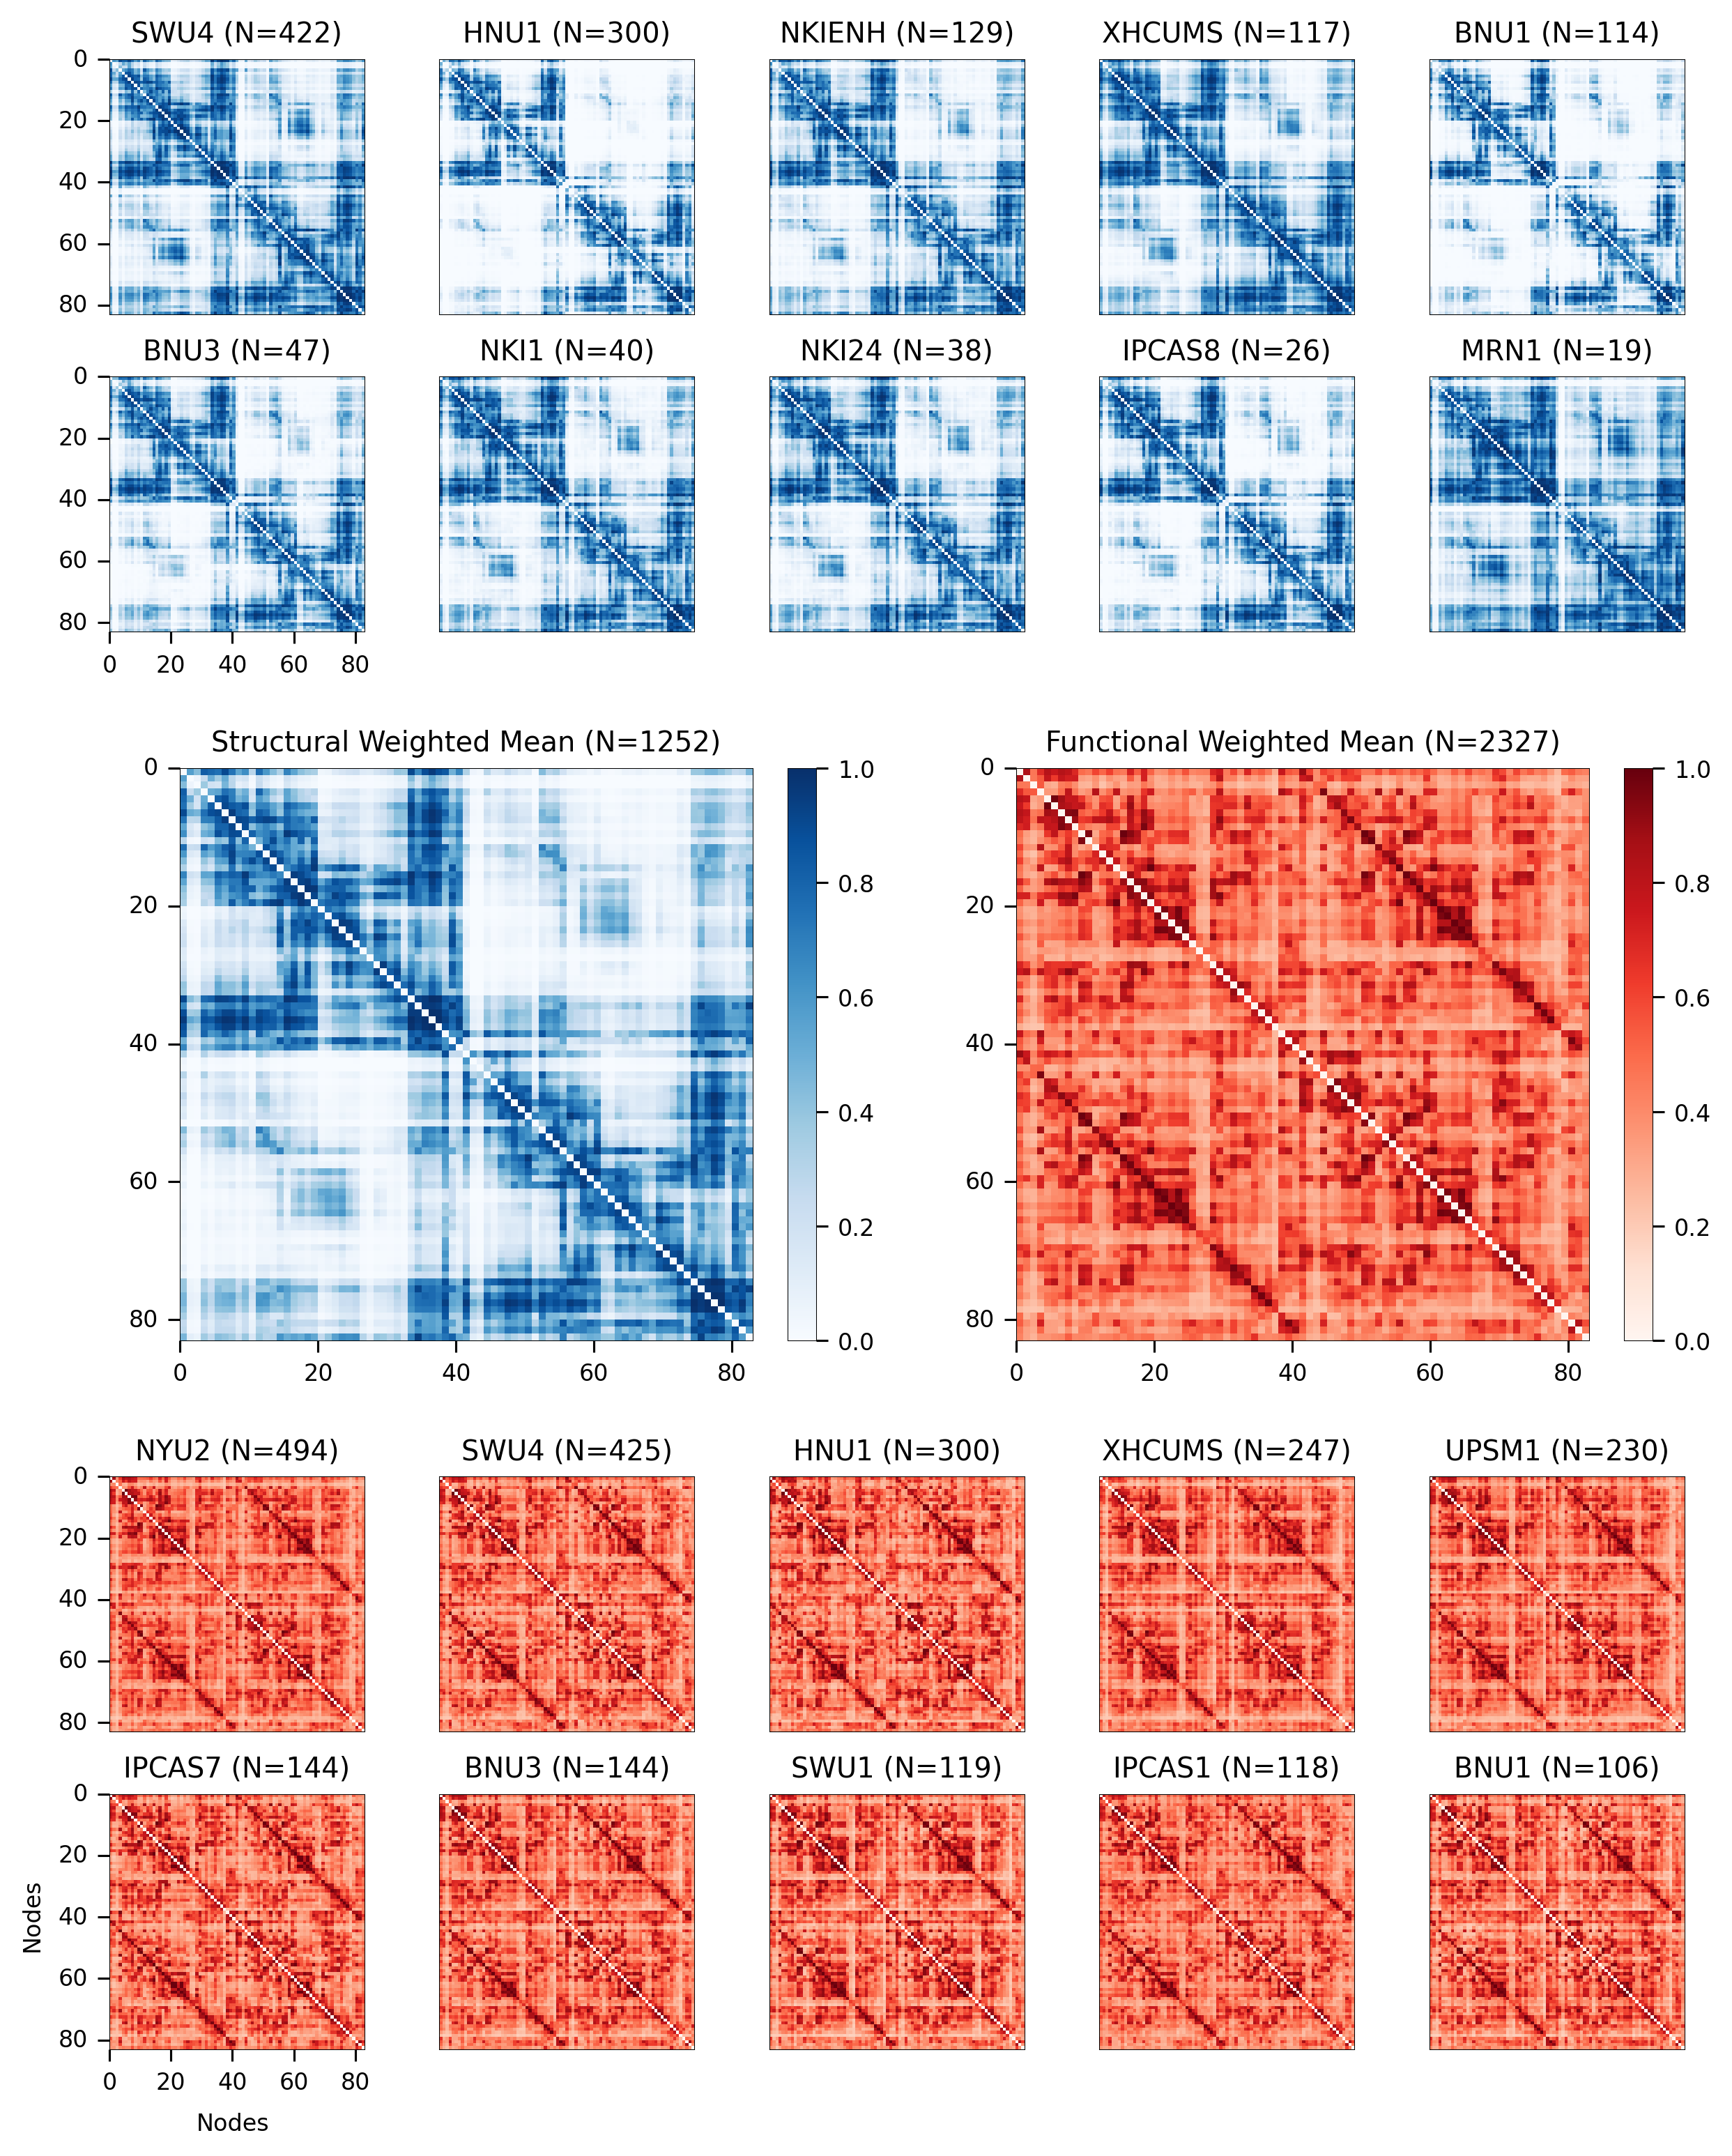

In [3]:
sns.set_context("paper", font_scale=1)

fs = 8
tick_kwargs = dict(
    length=4,
    width=0.75,
    labelsize=fs,
    labelrotation=0,
    # pad=-1
)

fig = plt.figure(layout="constrained", figsize=(8, 10), dpi=300)
subfigs = fig.subfigures(nrows=3, ncols=1, wspace=0.07, hspace=.05)

top_ax = subfigs[0].subplots(ncols=5, nrows=2).ravel()
# mid_all = subfigs[1].subplots(ncols=4, nrows=1, width_ratios=[1, .1, 1, .1])
# mid_ax = mid_all[::2]
# cbar_ax = mid_all[1::2]
mid_ax = subfigs[1].subplots(ncols=2, nrows=1)
bot_ax = subfigs[2].subplots(ncols=5, nrows=2).ravel()

for ax, data, title in zip(top_ax, diffusion_connectomes, diff_titles):
    sns.heatmap(
        data,
        ax=ax,
        cmap="Blues",
        vmin=0,
        vmax=1,
        cbar=False,
        square=True,
    )

    ax.set_title(title)

for ax, data, title in zip(bot_ax, functional_connectomes, func_titles):
    sns.heatmap(
        data,
        ax=ax,
        cmap="Reds",
        vmin=0,
        vmax=1,
        cbar=False,
        square=True,
    )
    ax.tick_params(
        axis="both",
        labelbottom=False,
        labelleft=False,
        bottom=False,
        left=False,
    )
    ax.set_title(title)


for mean, ax, cmap, title in zip(
    means,
    mid_ax,
    ["Blues", "Reds"],
    [
        f"Structural Weighted Mean (N={sum(diff_n)})",
        f"Functional Weighted Mean (N={sum(func_n)})",
    ],
):
    sns.heatmap(
        mean,
        ax=ax,
        # cbar_axs=cax,
        cmap=cmap,
        vmin=0,
        vmax=1,
        cbar=True,
        square=True,
    )
    ax.set_title(title)

cbar_axs = [a.collections[0].colorbar.ax for a in mid_ax]

# remove ticks and add in spines
for axs in [top_ax, mid_ax, bot_ax]:
    for ax in axs:
        ax.tick_params(
            axis="both",
            labelbottom=False,
            labelleft=False,
            bottom=False,
            left=False,
        )
        for side in ["top", "right", "left", "bottom"]:
            ax.spines[side].set_visible(True)
            ax.spines[side].set_linewidth(0.25)

for ax in cbar_axs:
    ax.tick_params(
        axis="both",
        **tick_kwargs,
    )
    for side in ["top", "right", "left", "bottom"]:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_linewidth(0.25)

# Add in ticks and labels for specific axes
for axs in [top_ax, bot_ax]:
    for idx, ax in enumerate(axs):
        if idx in [0, 5]:
            ax.tick_params(
                axis="both",
                labelbottom=False,
                labelleft=True,
                bottom=False,
                left=True,
                **tick_kwargs,
            )
            ax.set_yticks(range(0, 81, 20))
            ax.set_yticklabels(range(0, 81, 20))
        if idx == 5:
            ax.tick_params(
                axis="both",
                labelbottom=True,
                labelleft=True,
                bottom=True,
                left=True,
                **tick_kwargs,
            )
            ax.set_xticks(range(0, 81, 20))
            ax.set_xticklabels(range(0, 81, 20))

for ax in mid_ax:
    ax.tick_params(
        axis="both",
        labelbottom=True,
        labelleft=True,
        bottom=True,
        left=True,
        **tick_kwargs,
    )
    ax.set_xticks(range(0, 81, 20))
    ax.set_xticklabels(range(0, 81, 20))
    ax.set_yticks(range(0, 81, 20))
    ax.set_yticklabels(range(0, 81, 20))


subfigs[-1].text(
    0.11,
    -0.01,
    "Nodes",
    ha="center",
    va="center",
    fontsize=fs,
    transform=subfigs[-1].transFigure,
)
subfigs[-1].text(
    -0.01,
    .09,
    "Nodes",
    ha="center",
    va="center",
    rotation=90,
    fontsize=fs,
    transform=subfigs[-1].transFigure,
)

fig.savefig("./figures/figure2.pdf", bbox_inches="tight", dpi=300)
fig.savefig("./figures/figure2.png", bbox_inches="tight", dpi=300)